In [10]:
import polars as pl
import numpy as np
import statsmodels.api as sm

# 读取数据
data = pl.read_parquet("hourly_data.pa")

df = data.sort('open_time').sort('symbol')

# 计算每个时刻所有 symbol 的 taker_buy_quote_volume 的总和
df = df.with_columns([
    (pl.col('close') / (pl.col('close').shift(1).over('symbol')) - 1).alias('return'),
    (pl.col("quote_volume") - pl.col('taker_buy_quote_volume')).alias("taker_sell_quote_volume")
])

# 计算每个 symbol 在每个时刻的 taker_buy_quote_volume 与总和的比例
df = df.with_columns([
    (pl.col("taker_buy_quote_volume") / pl.col("taker_sell_quote_volume")).alias("beat_ratio")
])

df

open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,symbol,return,taker_sell_quote_volume,beat_ratio
datetime[μs],f64,f64,f64,f64,f64,datetime[μs],f64,i64,f64,f64,str,f64,f64,f64
2022-09-09 13:00:00,0.4728,0.4874,0.3663,0.451,6.5705837e7,2022-09-09 13:59:59.999,2.8487e7,124200,3.3701922e7,1.4632e7,"""1000LUNCUSDT""",null,1.3855e7,1.056036
2022-09-09 14:00:00,0.451,0.4609,0.4277,0.4592,4.1316126e7,2022-09-09 14:59:59.999,1.8355e7,94104,2.0298138e7,9.0220e6,"""1000LUNCUSDT""",0.018182,9.3333e6,0.966647
2022-09-09 15:00:00,0.4594,0.4734,0.4416,0.4555,4.4134479e7,2022-09-09 15:59:59.999,2.0198e7,103417,2.2353913e7,1.0239e7,"""1000LUNCUSDT""",-0.008057,9.9586e6,1.028181
2022-09-09 16:00:00,0.4554,0.458,0.4175,0.4297,4.6242265e7,2022-09-09 16:59:59.999,2.0187e7,84951,2.1467246e7,9.3760e6,"""1000LUNCUSDT""",-0.056641,1.0811e7,0.867292
2022-09-09 17:00:00,0.4297,0.4418,0.4071,0.4156,2.661109e7,2022-09-09 17:59:59.999,1.1376e7,50896,1.2655405e7,5.4132e6,"""1000LUNCUSDT""",-0.032814,5.9630e6,0.9078
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2022-12-31 19:00:00,0.1494,0.1498,0.1494,0.1496,748908.5,2022-12-31 19:59:59.999,112011.25443,882,481198.1,71987.20389,"""ZRXUSDT""",0.001339,40024.05054,1.798599
2022-12-31 20:00:00,0.1496,0.1497,0.1494,0.1496,501195.0,2022-12-31 20:59:59.999,74979.34106,751,282290.8,42242.69096,"""ZRXUSDT""",0.0,32736.6501,1.290379
2022-12-31 21:00:00,0.1496,0.1497,0.149,0.149,413737.4,2022-12-31 21:59:59.999,61817.02306,583,132775.7,19839.82814,"""ZRXUSDT""",-0.004011,41977.19492,0.472633


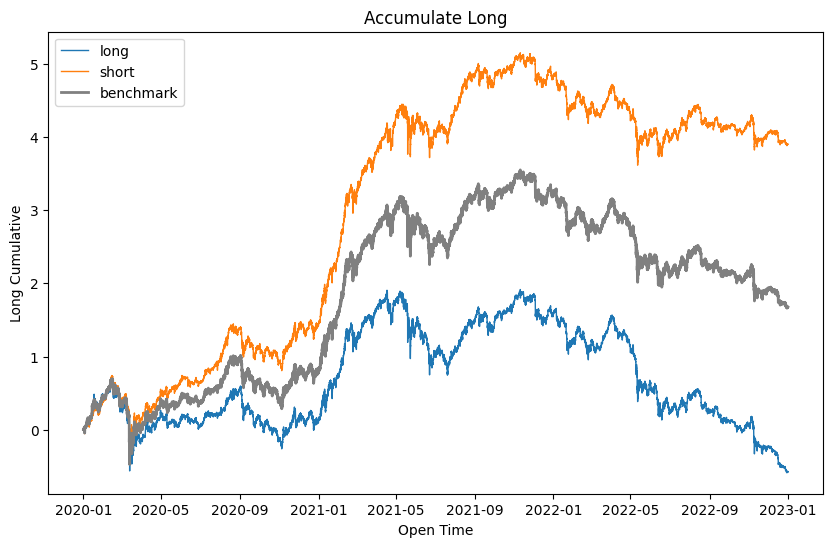

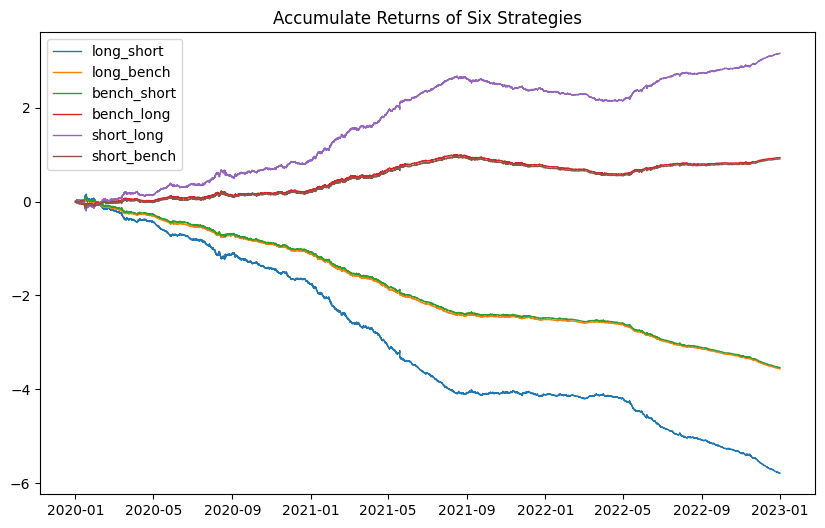

long: 
ann_return = -0.192  sharpe = -0.1767  maxdd = 0.8577  calmar_ratio = -0.2238  

short: 
ann_return = 1.2981  sharpe = 1.1774  maxdd = 0.6639  calmar_ratio = 1.9553  

bench: 
ann_return = 0.5575  sharpe = 0.513  maxdd = 0.6895  calmar_ratio = 0.8085  

long_short: 
ann_return = -1.9281  sharpe = -7.3544  maxdd = 5.1255  calmar_ratio = -0.3762  

long_bench: 
ann_return = -1.1875  sharpe = -8.9931  maxdd = 3.4409  calmar_ratio = -0.3451  

bench_long: 
ann_return = 0.3115  sharpe = 2.359  maxdd = 0.2137  calmar_ratio = 1.4575  

short_long: 
ann_return = 1.0521  sharpe = 4.013  maxdd = 0.2311  calmar_ratio = 4.5529  

short_bench: 
ann_return = 0.3026  sharpe = 2.2931  maxdd = 0.212  calmar_ratio = 1.4273  

bench_short: 
ann_return = -1.1786  sharpe = -8.9311  maxdd = 3.3292  calmar_ratio = -0.354  



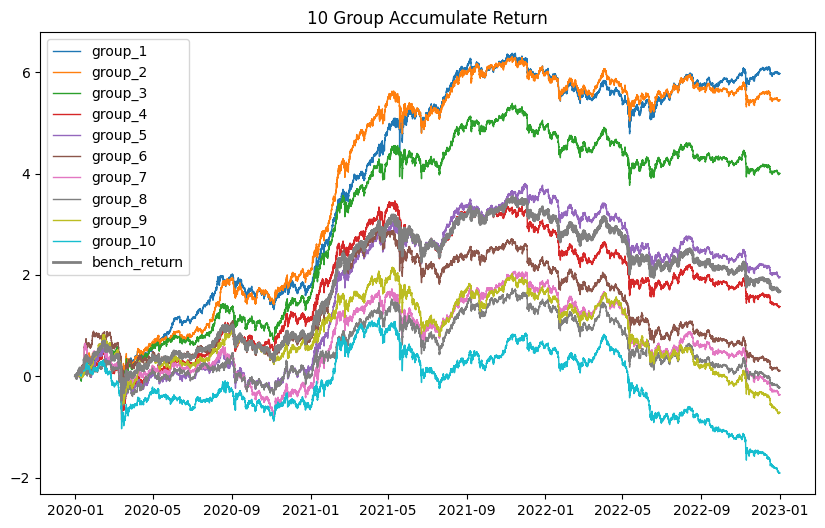

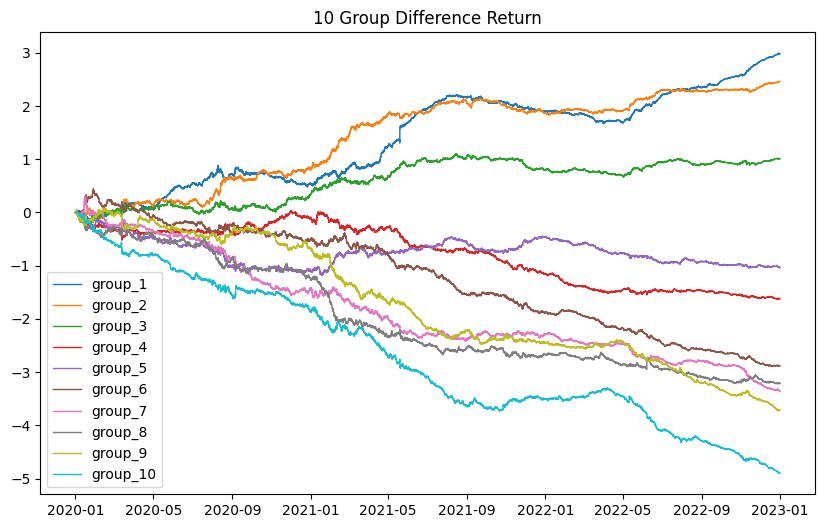

group_1: 
ann_return = 1.9893  sharpe = 1.7654  maxdd = 0.5801  calmar_ratio = 3.4292  

group_2: 
ann_return = 1.8163  sharpe = 1.5985  maxdd = 0.6319  calmar_ratio = 2.8743  

group_3: 
ann_return = 1.333  sharpe = 1.1693  maxdd = 0.6446  calmar_ratio = 2.0678  

group_4: 
ann_return = 0.4572  sharpe = 0.3971  maxdd = 0.9104  calmar_ratio = 0.5021  

group_5: 
ann_return = 0.6518  sharpe = 0.5637  maxdd = 0.7577  calmar_ratio = 0.8602  

group_6: 
ann_return = 0.0347  sharpe = 0.0301  maxdd = 0.7232  calmar_ratio = 0.0479  

group_7: 
ann_return = -0.1226  sharpe = -0.107  maxdd = 0.8664  calmar_ratio = -0.1415  

group_8: 
ann_return = -0.0748  sharpe = -0.065  maxdd = 0.8138  calmar_ratio = -0.0919  

group_9: 
ann_return = -0.2388  sharpe = -0.2085  maxdd = 0.9176  calmar_ratio = -0.2603  

group_10: 
ann_return = -0.6362  sharpe = -0.5721  maxdd = 1.4255  calmar_ratio = -0.4463  

-----------------------------------------
group_difference_1: 
ann_return = 0.9938  sharpe = 3.1473 

In [11]:
from factor_analysis.factor_analysis import FactorAnalysis

factors = df.select(['open_time', 'symbol', 'beat_ratio'])

# 使用示例
analysis = FactorAnalysis(factors, data)
analysis.run_full_analysis()